In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
pd.options.display.float_format = '{:.2f}'.format #Supress scientific notation 

In [2]:
train = pd.read_csv("C:/Users/Phanindra.Panthagani/Documents/Fractal Work/LibertyMutual/train/train.csv")
train.set_index('id',inplace=True)
display(train.head())

C:\Users\Phanindra.Panthagani\Anaconda3\envs\nw_training\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,target,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,weatherVar227,weatherVar228,weatherVar229,weatherVar230,weatherVar231,weatherVar232,weatherVar233,weatherVar234,weatherVar235,weatherVar236
id,,,,,,,,,,,,,,,,,,,,,
1,0.00,Z,Z,Z,N1,Z,Z,3,1,A,...,0.17,0.00,0.00,0.00,1.12,1.22,0.11,2.36,0.40,0.14
2,0.00,Z,Z,Z,C1,Z,Z,3,2,A,...,0.27,0.00,27.51,0.00,3.83,1.04,0.03,0.86,0.23,0.74
3,0.00,3,Z,4,J3,B,B,2,4,Z,...,0.98,0.00,0.00,0.46,0.10,1.08,0.57,0.70,0.69,0.07
4,0.00,3,Z,4,H1,B,Z,3,4,Z,...,0.31,0.00,0.00,4.35,0.40,0.34,0.29,0.00,0.00,0.09
5,0.00,Z,Z,Z,H1,Z,Z,2,4,A,...,2.17,0.00,0.00,0.51,0.52,1.02,1.31,1.34,2.95,0.82


In [3]:
#Generate Pandas train report 
#train_profile = ProfileReport(train, title="Pandas Profiling Report- Train Liberty Mutual")


In [4]:
test = pd.read_csv("C:/Users/Phanindra.Panthagani/Documents/Fractal Work/LibertyMutual/test/test.csv")
test.set_index('id',inplace=True)
test.head()

C:\Users\Phanindra.Panthagani\Anaconda3\envs\nw_training\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,weatherVar227,weatherVar228,weatherVar229,weatherVar230,weatherVar231,weatherVar232,weatherVar233,weatherVar234,weatherVar235,weatherVar236
id,,,,,,,,,,,,,,,,,,,,,
10,Z,Z,Z,N1,Z,Z,4,2,A,4.17,...,1.66,0.00,0.00,0.13,0.29,0.82,2.09,0.43,0.75,0.35
11,Z,Z,Z,O2,Z,Z,6,4,A,4.04,...,0.99,0.00,0.00,0.00,0.27,0.73,0.97,0.21,0.23,0.20
14,Z,Z,Z,D3,Z,Z,7,2,A,3.78,...,0.43,0.00,0.00,0.53,0.18,1.05,0.67,0.96,0.40,0.06
16,2,Z,Z,G1,Z,Z,5,3,Z,4.31,...,1.04,0.00,0.00,0.00,0.79,0.66,1.12,0.00,0.00,0.60
20,Z,Z,Z,E4,Z,Z,2,2,A,3.90,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Configuration 

In [5]:
#Creating categorical variable names and numerical ones 

config_categ_vars = ['var1','var2','var3','var4','var5','var6','var7','var8','var9','dummy']
traincolslist = train.columns.to_list()
config_var_noncontinous = config_categ_vars + ['target'] 

train_weight = train['var11']
test_weight= test['var11']
#From modelling 
variablestodrop = ['var12','var14','var16']
config_continous_vars = list(set(traincolslist)-set(config_var_noncontinous)) 
config_continous_vars = list(set(config_continous_vars)-set(variablestodrop))

train.drop(columns= variablestodrop,inplace=True)
test.drop(columns = variablestodrop,inplace=True)
#print('var12' in config_continous_vars)

In [6]:
y = train['target']
X= train.drop(columns = ['target'])
print(X.columns)

Index(['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9',
       'var10',
       ...
       'weatherVar227', 'weatherVar228', 'weatherVar229', 'weatherVar230',
       'weatherVar231', 'weatherVar232', 'weatherVar233', 'weatherVar234',
       'weatherVar235', 'weatherVar236'],
      dtype='object', length=297)


# EDA

# Types of Variables 
Weather - 236

Crime - 9

dummy - 1 

Policy - 17

id - 1 

target - 1 

# Insight 
Very Skewed distribution ,99.7% zeros, model with Tweedie distribution

In [7]:
#Level Z is missing value in categorical data as in the problem statement, we can replace Z with np.Nan 
train['var7'].replace({'Z': np.nan},inplace=True)
train['var7'].isna().sum()
# All the Z's are replaced with Nan values, these can be replaced with imputation 


856

# Imputation and One hot encoding

In [8]:
#Using a simple strategy to one hot encode categories given a df 

def Imputeallcolumns_onehotcategorical(df,categ_columns = None ,continouscolumns = None):
    '''
    Function to Impute Cagtegorical columns in a dataframe with mode values 
    This function also one hot encodes categorical columns 
    df : pandas dataframe
    categ_columns : Categorical column names
    continouscolumns : Continous Column names
    
    '''
    verbose=False
    ##Categorical variables
    for col in categ_columns:
        col_mode=df[col].value_counts().index[0] #Calculate the mode of categorical variable 
        #Impute with categorical mode next line
        df[col].fillna(col_mode, inplace=True)
        #one hot encoding categorical variables below
        if(verbose):
            print("One hot encdoing the column",col)
        prefixname = 'one_hot_'+ col
        
        df = pd.concat([df,pd.get_dummies(df[col], prefix= prefixname ,dummy_na=False)],axis=1).drop([col],axis=1)

    ##Continous variables
    for col in continouscolumns:
        if(verbose):
            print("Imputing the continous Col: ",col)
        df[col] = pd.to_numeric(df[col], downcast="float")
        col_median =df[col].median(skipna=True ) #Calculate the mode of categorical variable 
        if(col == 'var12'):
            print("Col median for var 12 is",col_median)
        df[col]= df[col].fillna(col_median)
        #df[col].replace({'NaN': col_median} ,inplace=True)
        
    return df 

In [9]:
train_imputed = Imputeallcolumns_onehotcategorical(train,config_categ_vars,config_continous_vars)
test_imputed =  Imputeallcolumns_onehotcategorical(test,config_categ_vars,config_continous_vars)

C:\Users\Phanindra.Panthagani\Anaconda3\envs\nw_training\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:

train_imputed.head()

,target,var10,var11,var13,var15,var17,crimeVar1,crimeVar2,crimeVar3,crimeVar4,...,one_hot_var8_3,one_hot_var8_4,one_hot_var8_5,one_hot_var8_6,one_hot_var8_Z,one_hot_var9_A,one_hot_var9_B,one_hot_var9_Z,one_hot_dummy_A,one_hot_dummy_B
id,,,,,,,,,,,,,,,,,,,,,
1,0.00,3.90,705.91,0.00,29.00,84.34,0.87,0.63,0.69,0.70,...,0,0,0,0,0,1,0,0,1,0
2,0.00,3.90,778.94,1.27,23.00,100.00,1.05,0.67,0.90,0.66,...,0,0,0,0,0,1,0,0,1,0
3,0.00,4.31,686.73,2.48,26.00,0.00,1.89,1.51,1.27,1.26,...,0,1,0,0,0,0,0,1,0,1
4,0.00,4.31,3515.21,2.05,22.00,100.00,1.66,1.34,0.96,1.33,...,0,1,0,0,0,0,0,1,0,1
5,0.00,3.90,1014.57,0.83,21.00,2.42,0.89,1.38,1.13,1.25,...,0,1,0,0,0,1,0,0,1,0


In [11]:

train_imputed.isnull().sum().sum()

0

# Modelling

# Train Test split with stratifying

In [12]:
from statsmodels import genmod
import statsmodels as sm
from sklearn.model_selection import train_test_split
train_imputed['target_zeroornot_flag'] = (train_imputed['target'] == 0.0)
y = train_imputed['target']
X= train_imputed.drop(columns = ['target'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                    stratify= X['target_zeroornot_flag'],  #Stratifying using the flag 
                                                    test_size=0.2,random_state=123)


print(train_imputed['target_zeroornot_flag'].value_counts())
print(X_train['target_zeroornot_flag'].value_counts())

#Train has 80% non-zero target values as in the print statement below 

X_train.drop(columns = ['target_zeroornot_flag'],inplace=True)
X_valid.drop(columns = ['target_zeroornot_flag'],inplace=True)

print(X_train.shape)
print(X_valid.shape)

True     450873
False      1188
Name: target_zeroornot_flag, dtype: int64
True     360698
False       950
Name: target_zeroornot_flag, dtype: int64
(361648, 386)
(90413, 386)


C:\Users\Phanindra.Panthagani\Anaconda3\envs\nw_training\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#  Optimal P value

In [13]:

import statsmodels.api as sm
from scipy import stats
glmtweedie = sm.GLM(y_train,X_train.drop(columns=['var11']))
optimalp = glmtweedie.estimate_tweedie_power(mu=y_train, method='brentq', low=1.01, high=2.0)
print(optimalp)

1.01


C:\Users\Phanindra.Panthagani\Anaconda3\envs\nw_training\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Tuning Hyper parameters using Hyperopt (Bayesian Learning)  for light gbm

In [14]:

import lightgbm as lgb
tweediepower = optimalp
d_train = lgb.Dataset(X_train.drop(columns=['var11']), label=y_train,weight=X_train['var11']) #Passing weight column 
d_valid = lgb.Dataset(X_valid.drop(columns=['var11']), label=y_valid,weight=X_valid['var11'])
watchlist = [d_valid]

In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

def Gini(y_true, y_pred):
    # check and get number of samples
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]
    
    # sort rows on prediction column 
    # (from largest to smallest)
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:,0].argsort()][::-1,0]
    pred_order = arr[arr[:,1].argsort()][::-1,0]
    
    # get Lorenz curves
    L_true = np.cumsum(true_order) / np.sum(true_order)
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    L_ones = np.linspace(1/n_samples, 1, n_samples)
    
    # get Gini coefficients (area between curves)
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)
    
    # normalize to true Gini coefficient
    return G_pred/G_true
gini_scorer = make_scorer(Gini, greater_is_better=True, needs_proba=True)


In [16]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from lightgbm import LGBMRegressor
from hyperopt.pyll.base import scope
import eda_function_team2 as EDAF

def objective(params):
    params = {
        'learning_rate' : params['learning_rate'],
        'num_trees' : params['num_trees'],
        'application': 'tweedie', #Tweedie with log link : https://lightgbm.readthedocs.io/en/latest/Parameters.html
        'objective': 'tweedie',  #Everything should be tweedie for Tweedie regression 
        'metric': 'tweedie',
        'tweedie_variance_power' : tweediepower,
        
    }
    
    clf = LGBMRegressor(
        **params
    )
    
    clf.fit(X_train.drop(columns=['var11']),y_train,sample_weight=X_train['var11'])
    ytrain_predicted = clf.predict(X_train.drop(columns=['var11']),predict_contrib=True)
    trainmetrics = EDAF.calcu_metrics(y_train, ytrain_predicted, X_train.drop(columns=['var11']),weight_column= X_train['var11'], 
                                tweedie_p_value = tweediepower)
    tweedie_dev_train = trainmetrics[trainmetrics['Metrics'] == 'Tweedie deviance']['Value'].values
    print("tweedie_dev_train {} params {}".format(tweedie_dev_train.item(), params))
    return tweedie_dev_train.item()  #Retruning the actual value instead of an array 

space = {
    'max_depth': scope.int(hp.quniform('max_depth', 3, 128, 1)),
    'reg_alpha' :  hp.quniform('reg_alpha', 0, 1, 0.05),
    'learning_rate' :  hp.quniform('learning_rate', 0.04, 0.1, 0.01), #Choosing a Uniform distribution between 0 and 1
     'num_trees' :   scope.int(hp.quniform('num_trees', 100,3000, 100)) #Values like 100,200,300.....upto 3000
}



In [17]:

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

  0%|                                                                           | 0/10 [00:00<?, ?trial/s, best loss=?]

C:\Users\Phanindra.Panthagani\Anaconda3\envs\nw_training\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



tweedie_dev_train 0.006595937994108486 params {'learning_rate': 0.05, 'num_trees': 1000, 'application': 'tweedie', 'objective': 'tweedie', 'metric': 'tweedie', 'tweedie_variance_power': 1.01}
tweedie_dev_train 0.008294972775746702 params {'learning_rate': 0.05, 'num_trees': 800, 'application': 'tweedie', 'objective': 'tweedie', 'metric': 'tweedie', 'tweedie_variance_power': 1.01}
tweedie_dev_train 0.0014554561322929621 params {'learning_rate': 0.07, 'num_trees': 2500, 'application': 'tweedie', 'objective': 'tweedie', 'metric': 'tweedie', 'tweedie_variance_power': 1.01}
tweedie_dev_train 0.005396655120225031 params {'learning_rate': 0.08, 'num_trees': 700, 'application': 'tweedie', 'objective': 'tweedie', 'metric': 'tweedie', 'tweedie_variance_power': 1.01}
tweedie_dev_train 0.005551797789266837 params {'learning_rate': 0.09, 'num_trees': 600, 'application': 'tweedie', 'objective': 'tweedie', 'metric': 'tweedie', 'tweedie_variance_power': 1.01}
tweedie_dev_train 0.0068109521047709926 pa

# lgb model 5

In [18]:
best['max_depth'] = int(best['max_depth'])
best['num_trees'] = int(best['num_trees'])
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'learning_rate': 0.09, 'max_depth': 24, 'num_trees': 2500, 'reg_alpha': 0.9500000000000001}


In [19]:
#Using Light gbm regression 
from lightgbm import LGBMRegressor

import lightgbm as lgb


parameters = {
        'application': 'tweedie', #Tweedie with log link : https://lightgbm.readthedocs.io/en/latest/Parameters.html
        'objective': 'tweedie',  #Everything should be tweedie for Tweedie regression 
        'metric': 'tweedie',
        'tweedie_variance_power' : tweediepower,
    **(best)
}

parameters

{'application': 'tweedie',
 'objective': 'tweedie',
 'metric': 'tweedie',
 'tweedie_variance_power': 1.01,
 'learning_rate': 0.09,
 'max_depth': 24,
 'num_trees': 2500,
 'reg_alpha': 0.9500000000000001}

In [20]:
n_estimators = 1000
iteration_name= 'lgb_5_hyperpopt'
#Training 
lgb_basemodel = lgb.train(parameters, d_train, n_estimators,watchlist, verbose_eval=100)

[100]	valid_0's tweedie: 0.776411
[200]	valid_0's tweedie: 0.778834
[300]	valid_0's tweedie: 0.781144
[400]	valid_0's tweedie: 0.783769
[500]	valid_0's tweedie: 0.786372
[600]	valid_0's tweedie: 0.788855
[700]	valid_0's tweedie: 0.791355
[800]	valid_0's tweedie: 0.793861
[900]	valid_0's tweedie: 0.796446
[1000]	valid_0's tweedie: 0.798928
[1100]	valid_0's tweedie: 0.801407
[1200]	valid_0's tweedie: 0.803922
[1300]	valid_0's tweedie: 0.806593
[1400]	valid_0's tweedie: 0.809465
[1500]	valid_0's tweedie: 0.811884
[1600]	valid_0's tweedie: 0.814644
[1700]	valid_0's tweedie: 0.817134
[1800]	valid_0's tweedie: 0.819758
[1900]	valid_0's tweedie: 0.821988
[2000]	valid_0's tweedie: 0.824259
[2100]	valid_0's tweedie: 0.826261
[2200]	valid_0's tweedie: 0.82874
[2300]	valid_0's tweedie: 0.830592
[2400]	valid_0's tweedie: 0.832767
[2500]	valid_0's tweedie: 0.834905


In [21]:
#Make the model into pickle file 
import joblib
# save model
joblib.dump(lgb_basemodel, iteration_name+'.pkl')


['lgb_5_hyperpopt.pkl']

# Metrics

In [22]:
import eda_function_team2 as EDAF

#Predict the values using the lgb_basemodel
y_pred = lgb_basemodel.predict(X_valid.drop(columns=['var11']),predict_contrib=True)
#y_pred = np.exp(y_pred)

print(sum(y_pred<0))
print(y_pred)

validmetrics = EDAF.calcu_metrics(y_valid, y_pred, X_valid.drop(columns=['var11']),weight_column= X_valid['var11'], 
                                  tweedie_p_value = tweediepower)
validmetrics


####********** TODO : Write the sns function to get optimal tweedie p value 

0
[1.37992083e-07 2.86028856e-07 7.53766109e-06 ... 3.90930617e-07
 1.38746695e-08 4.73445115e-09]


,Metrics,Value
0,Tweedie deviance,0.23
1,RMSE,0.27
2,RMSLE,0.08
3,Gini Coefficient,0.21


In [23]:

ytrain_predicted = lgb_basemodel.predict(X_train.drop(columns=['var11']),predict_contrib=True)
#ytrain_predicted = np.exp(ytrain_predicted)

trainmetrics = EDAF.calcu_metrics(y_train, ytrain_predicted, X_train.drop(columns=['var11']),weight_column= X_train['var11'], 
                                tweedie_p_value = tweediepower)
trainmetrics

,Metrics,Value
0,Tweedie deviance,0.00
1,RMSE,0.04
2,RMSLE,0.01
3,Gini Coefficient,1.00


In [24]:
tweedie_dev_train=trainmetrics[trainmetrics['Metrics'] == 'Tweedie deviance']['Value'].values
tweedie_dev_train.item()

0.0010869246435816174

# SHAP Values Feature importance

In [25]:
import shap

In [26]:
%time shap_values = shap.TreeExplainer(lgb_basemodel).shap_values(X_valid.drop(columns=['var11']))

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Wall time: 27min 56s


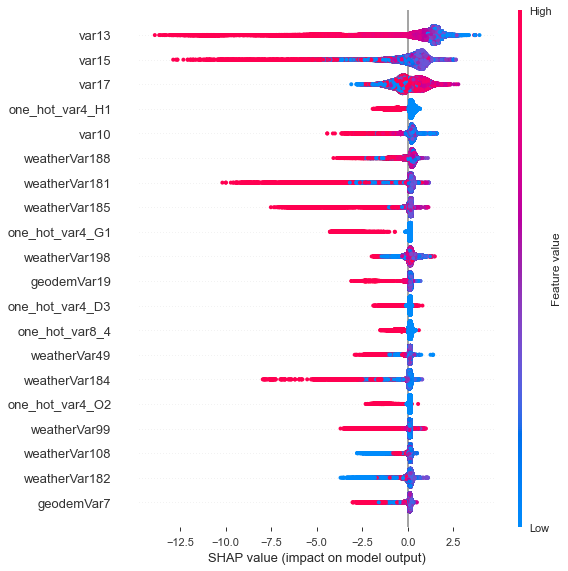

In [27]:
shap.summary_plot(shap_values, X_valid.drop(columns=['var11']))

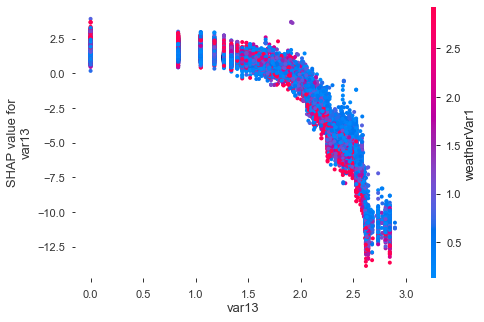

In [28]:
shap.dependence_plot("var13", shap_values,  X_valid.drop(columns=['var11']))

In [29]:
X_valid.drop(columns=['var11']).head()
len(X_valid.drop(columns=['var11']))

90413